In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('corona_dataset.csv')
dataset.head()

,Unnamed: 0,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,0,Lagos,104157,1014,102372,771
1,1,FCT,29504,15,29240,249
2,2,Rivers,18093,44,17894,155
3,3,Kaduna,11615,12,11514,89
4,4,Oyo,10336,2,10132,202


In [4]:
X = dataset.iloc[:, [3, 5]].values

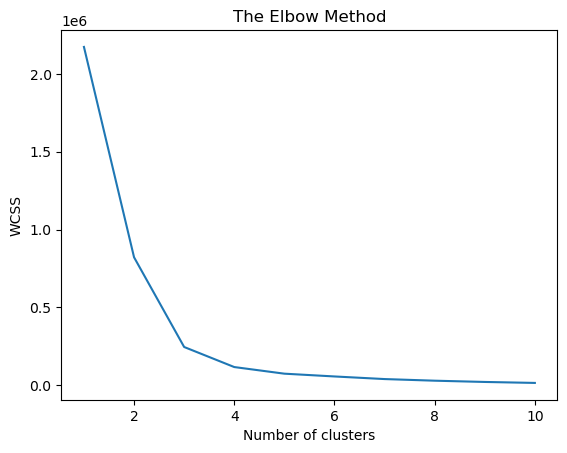

In [7]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
wcss

[2172947.5675675673,
 822047.8611111112,
 245758.25,
 116959.60714285713,
 74384.29166666667,
 56538.875,
 39788.30576441102,
 29321.555555555555,
 21238.722222222223,
 15017.055555555555]

In [23]:
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [26]:
y_kmeans

array([1, 0, 0, 2, 0, 2, 0, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

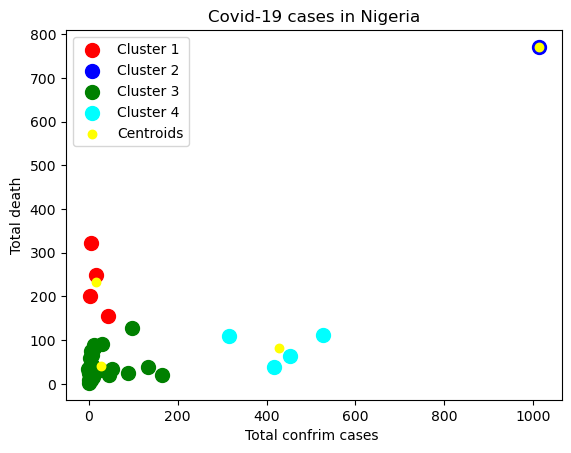

In [24]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 37, c = 'yellow', label = 'Centroids')
plt.title('Covid-19 cases in Nigeria')
plt.xlabel('Total confrim cases ')
plt.ylabel('Total death')
plt.legend()
plt.show()

In [30]:
y_means_df = pd.DataFrame(y_kmeans)

In [33]:
state_df = pd.DataFrame(dataset["States Affected"])


In [36]:
clustered_state = pd.concat([state_df, y_means_df], axis=1)
clustered_state.columns = ['States Affected', 'Cluster_Number']
clustered_state

,States Affected,Cluster_Number
0,Lagos,1
1,FCT,0
2,Rivers,0
3,Kaduna,2
4,Oyo,0
5,Plateau,2
6,Edo,0
7,Ogun,2
8,Delta,3
9,Kano,2


In [40]:
grp= clustered_state.groupby(['Cluster_Number', 'States Affected'])
grp.first()

Empty DataFrame
Columns: []
Index: [(0, Edo), (0, FCT), (0, Oyo), (0, Rivers), (1, Lagos), (2, Abia), (2, Adamawa), (2, Akwa Ibom), (2, Anambra), (2, Bauchi), (2, Bayelsa), (2, Benue), (2, Borno), (2, Cross River), (2, Ebonyi), (2, Ekiti), (2, Enugu), (2, Gombe), (2, Imo), (2, Jigawa), (2, Kaduna), (2, Kano), (2, Katsina), (2, Kebbi), (2, Kogi), (2, Niger), (2, Ogun), (2, Osun), (2, Plateau), (2, Sokoto), (2, Taraba), (2, Yobe), (2, Zamfara), (3, Delta), (3, Kwara), (3, Nasarawa), (3, Ondo)]